# 📺 Netflix EDA Project

This notebook explores the Netflix dataset to understand trends by type, genre, country, and release patterns.

Dataset source: [Netflix Titles on Kaggle](https://www.kaggle.com/datasets/shivamb/netflix-shows)

#Import Libraries

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [23]:
%matplotlib inline
sb.set(style="whitegrid")

#Load the Dataset

In [24]:
df = pd.read_csv('/content/sample_data/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


#Dataset Info

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


#Missing Values

In [26]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


#Content Type (Movie vs Tv Show)

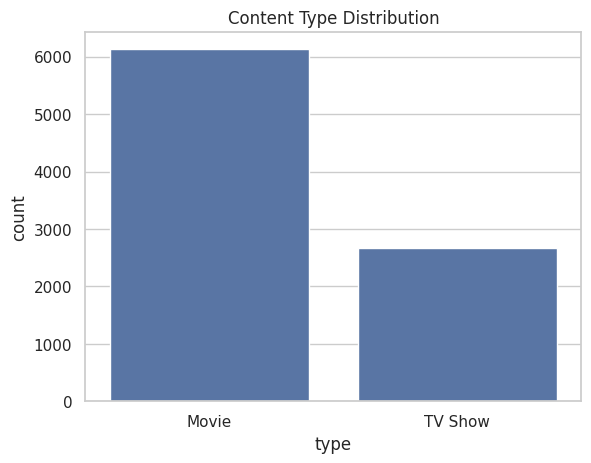

In [27]:
sb.countplot(x='type', data=df)
plt.title('Content Type Distribution')
plt.show()


#Insight:  
Netflix has more Movies than TV Shows, though both are well represented.
This shows Netflix's emphasis on offering a large movie collection.


#Top 10 Countries with Most Content

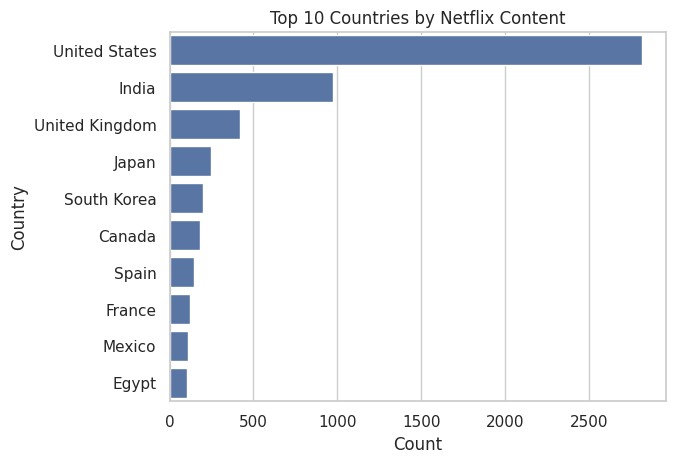

In [28]:
top_countries = df['country'].value_counts().head(10)
sb.barplot(y=top_countries.index, x=top_countries.values)
plt.title('Top 10 Countries by Netflix Content')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

#Insight:  
The United States has the highest number of Netflix titles, followed by India and the United Kingdom. These countries contribute most to Netflix's content library.


#Convert Date Column & Show Content Over Time

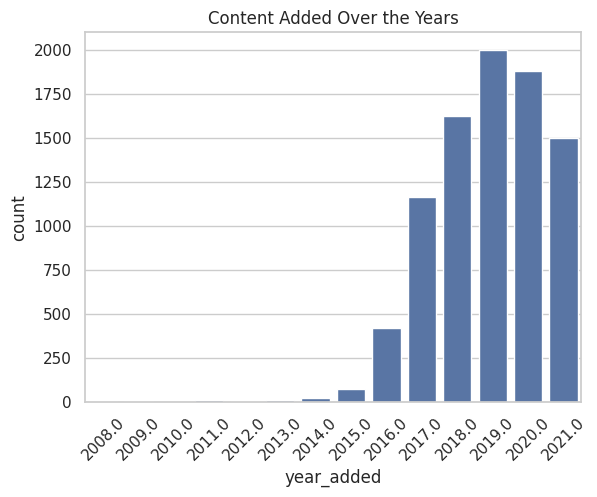

In [29]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year

sb.countplot(data=df, x='year_added', order=sorted(df['year_added'].dropna().unique()))
plt.title('Content Added Over the Years')
plt.xticks(rotation=45)
plt.show()


#Insight:  
Netflix significantly increased content additions starting around 2017, with a peak around 2019 and 2020. This shows their aggressive content expansion during that period.


#Entries added by each year

In [30]:
df['year_added'].value_counts().sort_index()

,count
year_added,
2008.0,2
2009.0,2
2010.0,1
2011.0,13
2012.0,3
2013.0,10
2014.0,23
2015.0,73
2016.0,418


#Movie Duration Distribution

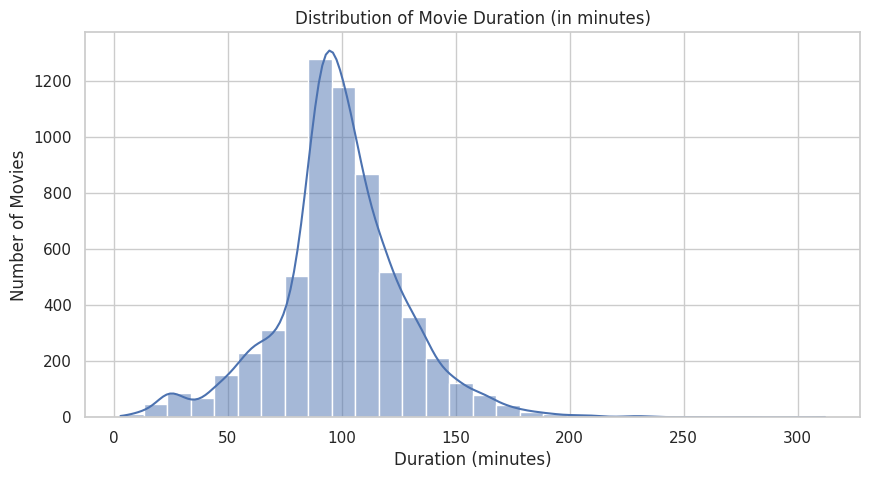

In [31]:
movies = df[df['type'] == 'Movie'].copy()
movies['duration_mins'] = movies['duration'].str.replace(' min', '').astype(float)

plt.figure(figsize=(10,5))
sb.histplot(movies['duration_mins'], bins=30, kde=True)
plt.title('Distribution of Movie Duration (in minutes)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.show()

#Insight:  
Most Netflix movies range between 90 and 110 minutes, which is standard for full-length feature films.
